<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://xgboost.readthedocs.io/en/latest/index.html" target="_blank">XGBoost</a></a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Average-Treatment-Effect" data-toc-modified-id="Average-Treatment-Effect-1.1.3.1"><span class="toc-item-num">1.1.3.1&nbsp;&nbsp;</span>Average Treatment Effect</a></span></li></ul></li></ul></li><li><span><a href="#New-Model" data-toc-modified-id="New-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>New Model</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Categorical-Features" data-toc-modified-id="Categorical-Features-1.2.1.1"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Categorical Features</a></span></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-1.2.1.2"><span class="toc-item-num">1.2.1.2&nbsp;&nbsp;</span>Pipeline</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#Features-Importance" data-toc-modified-id="Features-Importance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Features Importance</a></span><ul class="toc-item"><li><span><a href="#SHAP" data-toc-modified-id="SHAP-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://github.com/slundberg/shap" target="_blank">SHAP</a></a></span></li><li><span><a href="#XGBoost-features-importance" data-toc-modified-id="XGBoost-features-importance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><a href="https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score" target="_blank">XGBoost features importance</a></a></span></li></ul></li><li><span><a href="#Practical-Lessons-From-Facebook" data-toc-modified-id="Practical-Lessons-From-Facebook-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><a href="https://quinonero.net/Publications/predicting-clicks-facebook.pdf" target="_blank">Practical Lessons From Facebook</a></a></span><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Make-a-Submission" data-toc-modified-id="Make-a-Submission-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Make a Submission</a></span></li></ul></li></ul></li></ul></div>

Продолжаем работать над задачей CTR-prediction с использованием датасета от Criteo.

Описание задачи и данных можно посмотреть в notebook'e предыдущей практики (`sgd_logreg_nn/notebooks/ctr_prediction_mllib.ipynb`).

# [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html)


Утановим xgboost

In [1]:
!python3 -m pip install xgboost

  Using cached https://files.pythonhosted.org/packages/70/91/551d37ba472bcbd70a25e667acc65a18a9d053657b13afcf0f87aa24d7bb/xgboost-1.0.2-py3-none-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl


In [1]:
import os
import sys
import glob
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from typing import *

In [2]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import pyspark
import pyspark.sql.functions as F
from pyspark.conf import SparkConf
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql import Row

sys.path.append('./utils')

os.environ['PYSPARK_SUBMIT_ARGS'] = """
--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar
--py-files sparkxgb.zip pyspark-shell
""".replace('\n', ' ')

spark = SparkSession \
    .builder \
    .master('local[*]') \
    .appName("spark_sql_examples") \
    .config("spark.executor.memory", "24g") \
    .config("spark.driver.memory", "26g") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

from metrics import rocauc, logloss, ne
from processing import split_by_col

from sparkxgb.xgboost import *

Обратите внимание на слудующие строки:

* ```python
sys.path.append('./utils')
...
from metrics import rocauc, logloss, ne
from processing import split_by_col
```

В папке `utils` находится два файла (`metrics.py`, `processing.py`), которые содержат функции, которые нужно было реализовать в рамках предыдущей практики.


* ```python
os.environ['PYSPARK_SUBMIT_ARGS'] = """
--jars xgboost4j-spark-0.72.jar,xgboost4j-0.72.jar
--py-files sparkxgb.zip pyspark-shell
"""
...
from sparkxgb.xgboost import *
```

Для того чтобы в рамках инфраструктуры Spark можно было использовать XGBoost, мы воспользуемся библиотекой [XGBoost4J](https://xgboost.readthedocs.io/en/latest/jvm/xgboost4j_spark_tutorial.html).

В ходе выполнения занятий может быть полезно ознакомиться с исходным кодом обертки для питона, который находится в архиве `sparkxgb.zip`

In [3]:
DATA_PATH = '/home/egor/MLBD/data/criteo'

TRAIN_PATH = os.path.join(DATA_PATH, 'train.csv')
TEST_PATH = os.path.join(DATA_PATH, 'test.csv')

PREPROCESSING_PIPELINE_PATH = os.path.join(DATA_PATH, 'preprocessing_pipeline')
PREPROCESSING_PIPELINE_MTE_PATH = os.path.join(DATA_PATH, 'preprocessing_pipeline_MTE')
XGB_MODEL_PATH = os.path.join(DATA_PATH, 'xgb.model')
LOGREG_MODEL_PATH = os.path.join(DATA_PATH, 'logreg.model')

LOGREG_XGB_XGB_MODEL_PATH = os.path.join(DATA_PATH, 'logreg_xgb_xgb.model')
LOGREG_XGB_LOGREG_MODEL_PATH = os.path.join(DATA_PATH, 'logreg_xgb_logreg.model')
LOGREG_XGB_PIPELINE_PATH = os.path.join(DATA_PATH, 'logreg_xgb_preprocessing_pipeline')

In [4]:
all_metrics = {}

## Baseline Model
### Prepare Data

In [5]:
df = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

In [6]:
df = df.sample(False, 0.5)

In [7]:
num_columns = ['_c{}'.format(i) for i in range(1, 14)]
cat_columns = ['_c{}'.format(i) for i in range(14, 40)][:2]
len(num_columns), len(cat_columns)

(13, 2)

In [8]:
df = df.fillna(0, subset=num_columns)

Воспользуемся пайплайном из предыдущей практики

In [9]:
from pyspark.ml import PipelineModel


pipeline_model = PipelineModel.load(PREPROCESSING_PIPELINE_PATH)

In [10]:
pipeline_model.stages

[StringIndexer_16c03bf565da,
 StringIndexer_149397b704bd,
 OneHotEncoderEstimator_7bc8fceb2a72,
 VectorAssembler_7593a5c22141]

In [11]:
len(pipeline_model.stages[0].labels), len(pipeline_model.stages[1].labels)

(1381, 554)

Итоговая размерность пространства фичей

In [12]:
dim = len(num_columns) + len(pipeline_model.stages[0].labels) + len(pipeline_model.stages[1].labels)
dim

1948

In [13]:
df = pipeline_model \
    .transform(df) \
    .select(F.col('_c0').alias('label'), 'features', 'id') \
    .cache()

df.count()

1832419

In [14]:
train_df, val_df, test_df = split_by_col(df, 'id', [0.8, 0.1, 0.1])

In [15]:
train_df.count(), val_df.count(), test_df.count()

(1465935, 183242, 183241)

### Train

In [20]:
estimator = XGBoostEstimator(
    featuresCol="features", 
    labelCol="label", 
    predictionCol="prediction",
    colsample_bytree=0.9,
    eta=0.15,
    gamma=0.9,
    max_depth=8,
    min_child_weight=50.0,
    subsample=0.9,
    objective='binary:logistic',
    eval_metric='logloss', 
    silent=0,
    num_round=20,
    nthread=1,
    nworkers=2
)

In [21]:
train_df.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- id: long (nullable = true)



In [22]:
model = estimator.fit(train_df)

Сохраняем [booster](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster) обученной модели

In [23]:
model._call_java("booster").saveModel(XGB_MODEL_PATH)

### Evaluation

In [24]:
baseline_metrics = {}

#### Average Treatment Effect

Пусть даны две экспериментальные группы treatment ($T$) и control ($C$), где

* `treatment` - группа с изменением (например, новая модель)
* `control` - группа без изменений

Рассмотрим метрику $X$, значение которой мы расчитали для наших групп ($X_T, X_C$).

Тогда под ATE будем иметь в виду
$$ \Delta\% = \frac{X_T - X_C}{X_C} \cdot 100 $$

In [25]:
def get_ate(groups, control_name) -> pd.DataFrame:
    """Get Average Treatment Effect
    groups - dictionary where keys - names of models, values - dicts of pairs <metric_name>, <metric_value>
    control_name - name of baseline model
    
    return pd.DataFrame (rows corresponds to metrics, cols corresponds to models and ATE with respect to control)
    """
    baseline_metrics = groups[control_name]
    metrics = pd.Series([metric for metric in baseline_metrics])
    
    df = {'metrics': metrics}
    for model, model_metrics in groups.items():
        df[model] = pd.Series([
            (model_metrics[metric] - baseline_metrics[metric]) / baseline_metrics[metric] * 100
            for metric in metrics
        ])
    return pd.DataFrame(df).set_index('metrics')

In [26]:
rocauc(model, val_df, probabilities_col='probabilities')

0.7278465092519575

In [27]:
baseline_metrics['ROC AUC'] = rocauc(model, test_df, probabilities_col='probabilities')
baseline_metrics['ROC AUC']

0.7287448556443737

In [28]:
all_metrics['xgb_baseline'] = baseline_metrics

Сравним результаты с логрег моделью из предыдущей практики.

1. Загрузить обученную `LogReg` модель
2. Посчитать метрики на `test_df`

In [29]:
from pyspark.ml.classification import LogisticRegressionModel

lr_model = LogisticRegressionModel.load(LOGREG_MODEL_PATH)

Построить таблицу ATE используя метод `get_ate`

In [30]:
lr_metrics = {'ROC AUC': rocauc(lr_model, test_df, probabilities_col='probability')}
all_metrics['lr_model'] = lr_metrics

In [31]:
get_ate(all_metrics, 'xgb_baseline')

,xgb_baseline,lr_model
metrics,,
ROC AUC,0.0,-3.939414


## New Model
### Prepare Data

In [74]:
df_mte = sqlContext.read.format("com.databricks.spark.csv") \
    .option("delimiter", ",") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load('file:///' + TRAIN_PATH)

df_mte = df_mte.sample(False, 0.5)

df_mte = df_mte.fillna(0, subset=num_columns)

In [75]:
train_mte_df, val_mte_df, test_mte_df = split_by_col(df_mte, 'id', [0.8, 0.1, 0.1])

#### Categorical Features

See [Doc](https://spark.apache.org/docs/latest/ml-pipeline.html) for additional details on Transformers and Encoders.

Implement classes below

In [76]:
from pyspark.ml.util import DefaultParamsReadable, DefaultParamsWritable
from pyspark.ml.param import Params
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Fitted Model
class MeanTargetEncoderModel(pyspark.ml.Model, DefaultParamsReadable, DefaultParamsWritable):
    
    category2mean = Param(Params._dummy(), 'category2mean', '')
    inputCol = Param(Params._dummy(), 'inputCol', '')
    featuresCol = Param(Params._dummy(), 'featuresCol', '')
    defaultValue = Param(Params._dummy(), 'defaultValue', '')
    
    def __init__(self, category2mean: Dict = None, inputCol: str = None, 
                 featuresCol: str = None, defaultValue: float = None):
        super(MeanTargetEncoderModel, self).__init__()
        self._resetUid(self.uid)
        
        if category2mean is not None:
            self.set(self.category2mean, category2mean)
        if inputCol is not None:
            self.set(self.inputCol, inputCol)
        if featuresCol is not None:
            self.set(self.featuresCol, featuresCol)
        if defaultValue is not None:
            self.set(self.defaultValue, defaultValue)
        else:
            self.set(self.defaultValue, 0)
    
    def transform(self, df: pyspark.sql.DataFrame) -> pyspark.sql.DataFrame:
        category2mean = self.getOrDefault(self.category2mean)
        defaultValue = self.getOrDefault(self.defaultValue)
        
        def map_category(cat):
            if cat not in category2mean:
                return defaultValue
            return category2mean[cat]
        
        category_udf = udf(map_category, FloatType())
#         print(df.schema)
        return df.withColumn(
            self.getOrDefault(self.featuresCol), 
            category_udf(self.getOrDefault(self.inputCol))
        )

# Estimator
class MeanTargetEncoder(pyspark.ml.Estimator):
    
    def __init__(self, inputCol: str, targetCol: str, featuresCol: str, smoothingCoeff: float = 1.) -> None:
        super(MeanTargetEncoder, self).__init__()
        self.inputCol, self.targetCol, self.featuresCol = inputCol, targetCol, featuresCol
        self.smoothingCoeff = smoothingCoeff
    
    def fit(self, df: pyspark.sql.DataFrame) -> MeanTargetEncoderModel:
        mean_target_values = df \
            .groupby(self.inputCol) \
            .agg(F.avg(F.col(self.targetCol)), F.count(F.col(self.targetCol))) \
            .collect()

        defaultValue = df.agg(F.mean(self.targetCol)).collect()[0][0]

        category2mean = {
            category: (mean_value * count + self.smoothingCoeff) / (count + self.smoothingCoeff / defaultValue)
            for category, mean_value, count in mean_target_values
        }

        return MeanTargetEncoderModel(category2mean, self.inputCol, self.featuresCol, defaultValue)

#### Pipeline

In [77]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler


cat_enc_columns = [cat_col + '_enc' for cat_col in cat_columns]

mean_target_encoders = [MeanTargetEncoder(cat_col, '_c0', cat_enc_col) 
                        for cat_col, cat_enc_col in zip(cat_columns, cat_enc_columns)]

assembler = VectorAssembler(inputCols=num_columns + cat_enc_columns, outputCol="features").setHandleInvalid("keep")

pipeline = Pipeline(stages=mean_target_encoders + [assembler])

In [78]:
pipeline_model = pipeline.fit(train_mte_df)
pipeline_model.write().overwrite().save(PREPROCESSING_PIPELINE_MTE_PATH)

In [79]:
from pyspark.ml import PipelineModel


pipeline_model = PipelineModel.load(PREPROCESSING_PIPELINE_MTE_PATH)

In [80]:
train_mte_df = pipeline_model.transform(train_mte_df).select(F.col('_c0').alias('label'), 'features', 'id')
val_mte_df = pipeline_model.transform(val_mte_df).select(F.col('_c0').alias('label'), 'features', 'id')
test_mte_df = pipeline_model.transform(test_mte_df).select(F.col('_c0').alias('label'), 'features', 'id')

In [81]:
train_mte_df.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- id: long (nullable = true)



In [35]:
print(train_mte_df.count(), val_mte_df.count(), test_mte_df.count())

1466739 183342 183342


### Train

Train XGBoost on the new set of features

In [82]:
model_mte = estimator.fit(train_mte_df)

### Evaluation

Сравнить результаты новой модели с `xgb_baseline` и `log_reg` с помощью функции `get_ate`

In [83]:
xgb_mte_metrics = {'ROC AUC': rocauc(model_mte, test_mte_df, probabilities_col='probabilities')}
all_metrics['xgb_mte_model'] = xgb_mte_metrics

In [84]:
get_ate(all_metrics, 'xgb_baseline')

,xgb_baseline,lr_model,lrxgb_model,xgb_mte_model
metrics,,,,
ROC AUC,0.0,-3.939414,0.143764,0.605877


# Features Importance

## [SHAP](https://github.com/slundberg/shap)

Install SHAP

In [15]:
import shap
import xgboost as xgb

# load JS visualization code to notebook
shap.initjs()

bst = xgb.Booster()
bst.load_model(XGB_MODEL_PATH)

[23:09:18] WARNING: /workspace/src/learner.cc:556: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


Имея `booster` модели можно, например, посмотреть на то какие деревья получились в итоге.

In [8]:
print(bst.get_dump()[0])

0:[f0<1575] yes=1,no=2,missing=2
	1:[f12<4.99999905] yes=3,no=4,missing=3
		3:[f4<11.999999] yes=7,no=8,missing=7
			7:[f8<4.99999905] yes=15,no=16,missing=15
				15:[f12<1.99999905] yes=31,no=32,missing=31
					31:[f1394<2.00000095] yes=63,no=64,missing=64
						63:[f1<4.99999905] yes=127,no=128,missing=127
							127:[f1<0.999998987] yes=251,no=252,missing=252
								251:leaf=0.0961538553
								252:leaf=0.0304236207
							128:[f11<253] yes=253,no=254,missing=254
								253:leaf=0.187096775
								254:leaf=0.0974703655
						64:[f8<1.99999905] yes=129,no=130,missing=129
							129:[f4<11.999999] yes=255,no=256,missing=256
								255:leaf=-0.0183500908
								256:leaf=-0.0625695959
							130:[f1396<2.00000095] yes=257,no=258,missing=258
								257:leaf=-0.0521126762
								258:leaf=0.0490738377
					32:[f1394<2.00000095] yes=65,no=66,missing=66
						65:[f0<1.99999905] yes=131,no=132,missing=132
							131:leaf=-0.056549523
							132:[f4<4.99999905] yes=259,no=260,missing=2

In [33]:
sample_df = df.sample(False, 0.05)
sample_df.count()

91378

In [42]:
from scipy.sparse import csr_matrix


def df_to_csr(df, dim):
    data = []
    row_ind = []
    col_ind = []
    
    sparse_vecs = df.rdd.map(lambda row: row.features).collect()
    for i, vec in enumerate(sparse_vecs):
        for idx, val in zip(vec.indices, vec.values):
            data.append(val)
            row_ind.append(i)
            col_ind.append(idx)
        
    return csr_matrix((data, (row_ind, col_ind)), shape=(len(sparse_vecs), dim))

In [43]:
%%time
X = df_to_csr(sample_df, dim)
dtest = xgb.DMatrix(X)

CPU times: user 2.77 s, sys: 52.5 ms, total: 2.82 s
Wall time: 4.68 s


In [44]:
X_arr = X.toarray()

In [23]:
%%time
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(dtest, tree_limit=20)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


CPU times: user 3min 35s, sys: 867 ms, total: 3min 36s
Wall time: 28.6 s


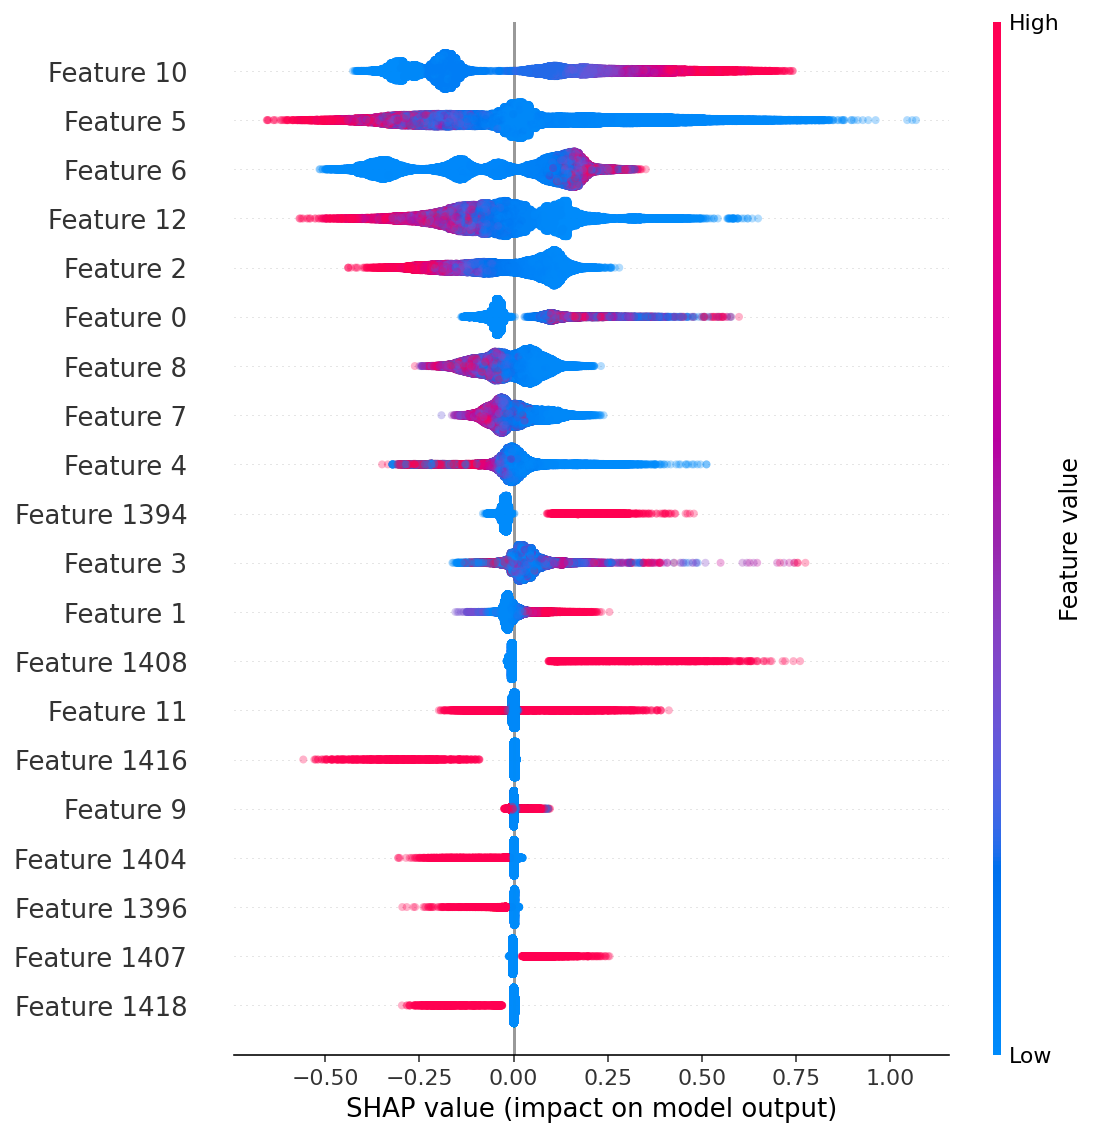

In [24]:
shap.summary_plot(shap_values, X_arr, max_display=20, alpha=0.3)

## [XGBoost features importance](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score)

In [25]:
def get_feature_score(booster, importance):
    gains_xgb = booster.get_score(importance_type=importance)
    gains = {}
    for f, g in gains_xgb.items():
        gains[f] = g
    sorted_gains = sorted(list(gains.items()), key=lambda x: -x[1])
    return sorted_gains


features_scores = get_feature_score(bst, 'gain')[:20]

In [26]:
import pandas as pd


f_names, f_scores = zip(*features_scores)
features_scores_pdf = pd.DataFrame({'feature': f_names, 'gain': f_scores})

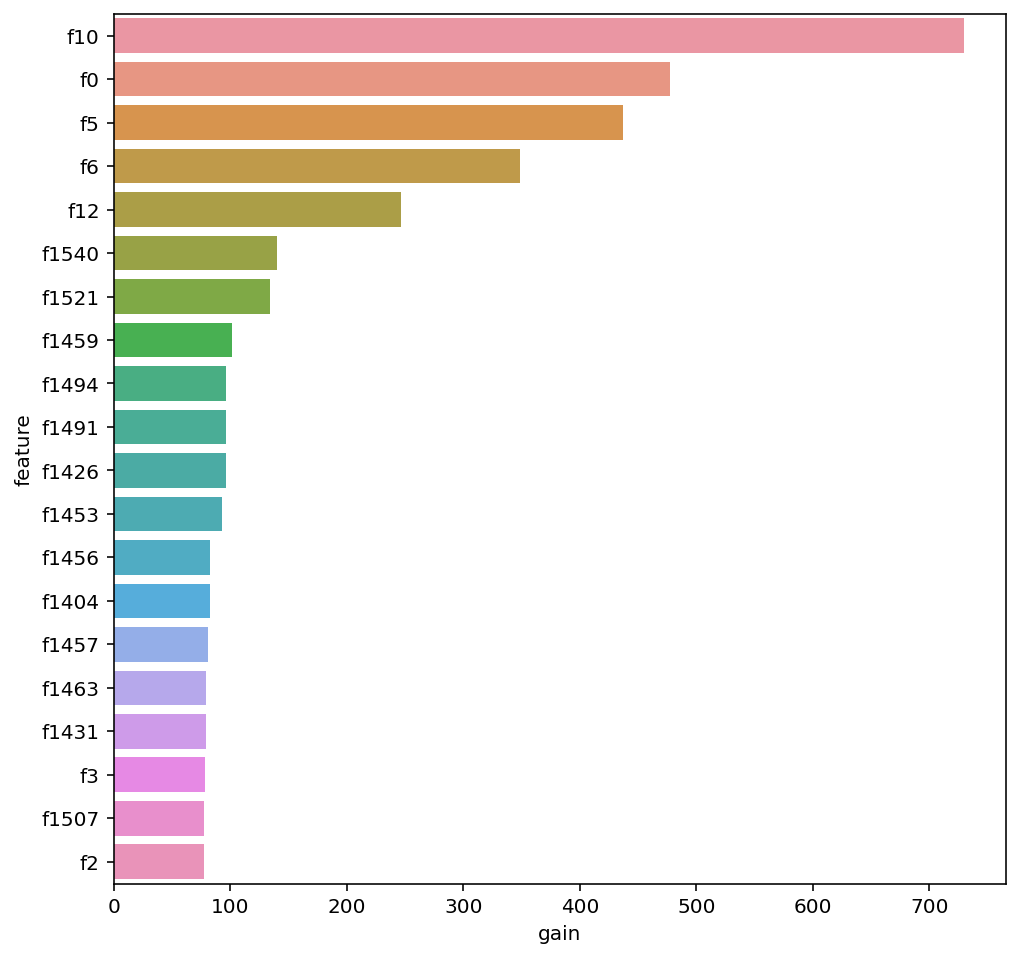

In [27]:
import seaborn as sns


_, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(x='gain', y='feature', data=features_scores_pdf)
plt.show()

# [Practical Lessons From Facebook](https://quinonero.net/Publications/predicting-clicks-facebook.pdf)

## Prepare Data

* Реализуйте модель из статьи (LogReg поверх XGBoost)

* Попробуйте реализовать Negatives Subsampling + Re-calibration описанный в статье (доп. баллы)

In [65]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, VectorAssembler
from pyspark.ml.classification import LogisticRegression

import xgboost as xgb
from scipy.sparse import csr_matrix


def df_to_csr(df, dim):
    data = []
    row_ind = []
    col_ind = []
    
    sparse_vecs = df.rdd.map(lambda row: row.features).collect()
    for i, vec in enumerate(sparse_vecs):
        for idx, val in zip(vec.indices, vec.values):
            data.append(val)
            row_ind.append(i)
            col_ind.append(idx)
        
    return csr_matrix((data, (row_ind, col_ind)), shape=(len(sparse_vecs), dim))


def _create_df_leaves(df: pyspark.sql.DataFrame, xgb_path: str, dim: int,
                      target_values: List[float] = None, target_col: str = None) -> pyspark.sql.DataFrame:
    bst = xgb.Booster()
    bst.load_model(xgb_path)
    X = df_to_csr(df, dim)

    predicted_leaves = bst.predict(xgb.DMatrix(X), pred_leaf=True)
    n, trees = predicted_leaves.shape
    tree_columns = [f'tree_{i}' for i in range(trees)]
    one_hot_columns = [f'tree_{i}_hot' for i in range(trees)]
    
    if target_col is not None:
        df_leaves = sqlContext.createDataFrame(
            [
                [target.label] + leaves.tolist()
                for target, leaves in zip(target_values, predicted_leaves)
            ],
            [target_col] + tree_columns
        )
    else:
        df_leaves = sqlContext.createDataFrame(
            [
                leaves.tolist()
                for leaves in predicted_leaves
            ],
            tree_columns
        )
    return df_leaves, tree_columns, one_hot_columns
    

class LogRegXGBModel(pyspark.ml.Model):
    
    def __init__(self, xgb_path: str, lr_path: str, pipeline_path: str, dim: int):
        super(LogRegXGBModel, self).__init__()
        self.xgb_path, self.lr_path, self.pipeline_path = xgb_path, lr_path, pipeline_path
        self.dim = dim
        
    def transform(self, df, got_target=True, target_col='label'):
        if got_target:
            target_values = df.select(target_col).collect()
            df_leaves, _, _ = _create_df_leaves(df, self.xgb_path, dim, target_values, target_col)
        else:
            df_leaves, _, _ = _create_df_leaves(df, self.xgb_path, dim)
        processing_pipeline_model = PipelineModel.load(self.pipeline_path)
        
        if got_target:
            df_leaves_processed = processing_pipeline_model.transform(df_leaves).select(target_col, 'features')
        else:
            df_leaves_processed = processing_pipeline_model.transform(df_leaves).select('features')
        lr_model = LogisticRegressionModel.load(self.lr_path)
        return lr_model.transform(df_leaves_processed).drop('features')
        

class LogRegXGBEstimator(pyspark.ml.Estimator):
    
    def __init__(
        self, targetCol: str, featuresCol: str, 
        xgbParam: Dict, lrParam: Dict, 
        xgb_path: str = LOGREG_XGB_XGB_MODEL_PATH, lr_path: str = LOGREG_XGB_LOGREG_MODEL_PATH, 
        pipeline_path: str = LOGREG_XGB_PIPELINE_PATH
    ):
        super(LogRegXGBEstimator, self).__init__()
        self.target_col = targetCol
        self.features_col = featuresCol
        self.xgb_param = xgbParam
        self.lr_param = lrParam
        self.xgb_path = xgb_path
        self.lr_path = lr_path
        self.pipeline_path = pipeline_path
        
    def fit(self, df: pyspark.sql.DataFrame, dim: int) -> LogRegXGBModel:
        target_values = df.select(self.target_col).collect()
        
        xgb_estimator = XGBoostEstimator(**self.xgb_param)
        xgb_model = xgb_estimator.fit(df)
        xgb_model._call_java("booster").saveModel(self.xgb_path)
        
        df_leaves, tree_columns, one_hot_columns = \
            _create_df_leaves(df, self.xgb_path, dim, target_values, self.target_col)
        
        processing_pipeline = Pipeline(stages=[
            OneHotEncoderEstimator(inputCols=tree_columns, outputCols=one_hot_columns),
            VectorAssembler(inputCols=one_hot_columns, outputCol='features')
        ])
        processing_pipeline_model = processing_pipeline.fit(df_leaves)
        processing_pipeline_model.write().overwrite().save(self.pipeline_path)
        
        df_leaves_processed = processing_pipeline_model.transform(df_leaves).select(self.target_col, 'features')
        
        lr = LogisticRegression(featuresCol='features', labelCol=self.target_col, predictionCol='prediction', 
                                **self.lr_param)
#         print(df_leaves_processed.limit(10).toPandas())
        lr_model = lr.fit(df_leaves_processed)
        lr_model.write().overwrite().save(self.lr_path)
        
        return LogRegXGBModel(self.xgb_path, self.lr_path, self.pipeline_path, dim)

## Train

In [66]:
xgb_params = {
    'featuresCol': "features", 
    'labelCol': "label", 
    'predictionCol': "prediction",
    'colsample_bytree': 0.9,
    'eta': 0.15,
    'gamma': 0.9,
    'max_depth': 8,
    'min_child_weight': 50.0,
    'subsample': 0.9,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss', 
    'silent': 0,
    'num_round': 20,
    'nthread': 1,
    'nworkers': 1
}

lr_params = {
    'maxIter': 20,
    'regParam': 0.01, 
    'elasticNetParam': 0.1
}

In [67]:
train_df.printSchema()

root
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- id: long (nullable = true)



In [71]:
lrxgb_estimator = LogRegXGBEstimator('label', 'features', xgb_params, lr_params)
lrxgb_model = lrxgb_estimator.fit(train_df, dim)

[23:39:10] WARNING: /workspace/src/learner.cc:556: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [72]:
lrxgb_metrics = {'ROC AUC': rocauc(lrxgb_model, test_df, probabilities_col='probability')}
all_metrics['lrxgb_model'] = lrxgb_metrics

[23:42:32] WARNING: /workspace/src/learner.cc:556: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [73]:
get_ate(all_metrics, 'xgb_baseline')

,xgb_baseline,lr_model,lrxgb_model
metrics,,,
ROC AUC,0.0,-3.939414,0.143764


## Evaluation

In [85]:
def calibration(model, df):
    pred_df = model.transform(df)
    sum_pred, sum_label = pred_df.groupBy().sum('prediction', 'label').head()
    return sum_pred / sum_label

Сравните новую модель со всеми предыдущими с помощью `get_ate`. При сравнении использовать еще и метрику calibration

In [87]:
all_metrics['xgb_baseline']['calibration'] = calibration(model, test_df)
all_metrics['lr_model']['calibration'] = calibration(lr_model, test_df)
all_metrics['xgb_mte_model']['calibration'] = calibration(model_mte, test_mte_df)
all_metrics['lrxgb_model']['calibration'] = calibration(lrxgb_model, test_df)

[23:51:29] WARNING: /workspace/src/learner.cc:556: Loading model from XGBoost < 1.0.0, consider saving it again for improved compatibility


In [88]:
get_ate(all_metrics, 'xgb_baseline')

,xgb_baseline,lr_model,lrxgb_model,xgb_mte_model
metrics,,,,
ROC AUC,0.0,-3.939414,0.143764,0.605877
calibration,0.0,-41.539440,2.220102,12.911117
